In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [97]:
df_initial = pd.read_csv('C:/Users/user/kicksharing.csv')

In [237]:
date_cols = ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']
for col in date_cols:
    df_initial[col] = pd.to_datetime(df_initial[col])

In [239]:
df_initial['trip_duration_min'] = (df_initial['book_end_dttm'] - df_initial['book_start_dttm']).dt.total_seconds() / 60

In [265]:
df_initial['day_of_week'] = df_initial['book_start_dttm'].dt.day_name()
df_initial['hour_of_day'] = df_initial['local_book_start_dttm'].dt.hour#час начала поездки
df_initial['month'] = df_initial['book_start_dttm'].dt.to_period('M').astype(str)

In [267]:
df_initial = df_initial.rename(columns={'party_rk':'party_rk_id'})

In [269]:
df_initial# не совпадает в точности с описанием, activation_cost - доплнительая колонка, не указанная в описании, Стоимость активации самоката

,order_rk,party_rk_id,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,day_of_week,hour_of_day,month
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,20.500238,Wednesday,11,2024-08
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,6.913893,Thursday,14,2024-10
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,6.844806,Thursday,7,2024-09
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,2.309382,Friday,16,2024-10
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,10.090489,Wednesday,6,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN,5.911005,Wednesday,13,2024-09
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,...,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN,8.193971,Tuesday,19,2024-09
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,...,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN,20.369977,Tuesday,16,2024-09
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,...,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN,3.541847,Thursday,18,2024-09


In [271]:
df_initial.shape

(396749, 24)

In [273]:
df_initial.info()#нет пропусков в идентификаторе клиента, идентификаторе заказа, возраста, данных, связанных с характеристиками поездки.
#marital_status_cd и education_level_cd не заполнено около половины

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 396749 non-null  int64         
 1   party_rk_id              396749 non-null  int64         
 2   gender_cd                393828 non-null  object        
 3   age                      396749 non-null  int64         
 4   education_level_cd       190059 non-null  object        
 5   marital_status_cd        217729 non-null  object        
 6   lvn_state_nm             362572 non-null  object        
 7   minute_cost              396749 non-null  float64       
 8   activation_cost          396749 non-null  float64       
 9   hold_amount              396749 non-null  float64       
 10  transport_model          396749 non-null  object        
 11  distance_km              396749 non-null  float64       
 12  created_dttm    

In [275]:
df_initial.duplicated().sum()

0

In [276]:
df_initial['lvn_state_nm'].nunique()#число уникальных регионов проживания

212

In [425]:
df_initial.describe()

,order_rk,party_rk_id,age,minute_cost,activation_cost,hold_amount,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,hour_of_day
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749,396749,396749,396749.000000,396749,396749.000000,366992.000000,21948.000000,396749.000000,396749.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,2024-08-18 19:57:21.649821952,2024-08-18 19:57:27.763654912,2024-08-18 20:08:54.222992128,3.536155,2024-08-18 20:29:37.922017280,127.647694,37.516121,127.789319,11.440989,12.550328
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,2024-04-07 14:56:47,2024-04-07 14:57:01.030814,2024-04-07 15:00:26.432310,0.000000,2024-04-07 14:57:01.030814,0.000000,-161.940000,1.000000,0.033400,0.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,2024-07-22 05:09:57,2024-07-22 05:10:01.884925952,2024-07-22 05:19:02.033711104,3.000000,2024-07-22 05:36:05.428699904,80.840000,11.240000,43.000000,4.763057,8.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,2024-08-23 10:44:44,2024-08-23 10:44:48.782873088,2024-08-23 10:56:03.260775936,3.000000,2024-08-23 11:26:34.415717120,103.940000,18.730000,62.000000,7.768650,13.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,2024-09-16 14:00:40,2024-09-16 14:00:44.200000,2024-09-16 14:13:01.654374912,3.000000,2024-09-16 14:33:59.144999936,142.100000,35.060000,81.000000,13.371040,17.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,2024-10-21 17:18:04,2024-10-21 17:18:07.715000,2024-10-21 17:23:06.640943,12.000000,2024-10-21 21:13:43.199000,5627.640000,3185.000000,55429.360970,715.172206,23.000000
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,NaN,NaN,NaN,1.209075,NaN,100.122365,75.208560,496.812143,13.174834,5.302066


In [278]:
df_initial

,order_rk,party_rk_id,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,day_of_week,hour_of_day,month
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN,20.500238,Wednesday,11,2024-08
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,...,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN,6.913893,Thursday,14,2024-10
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN,6.844806,Thursday,7,2024-09
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,...,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN,2.309382,Friday,16,2024-10
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,...,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN,10.090489,Wednesday,6,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,NaN,5.911005,Wednesday,13,2024-09
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,...,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,NaN,8.193971,Tuesday,19,2024-09
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,...,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,NaN,20.369977,Tuesday,16,2024-09
396747,306062051,863877659,M,19,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,...,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,NaN,3.541847,Thursday,18,2024-09


In [453]:
df_initial.query('distance_km > 100')

,order_rk,party_rk_id,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,day_of_week,hour_of_day,month
866,271245401,1024530479,M,46,NaN,NaN,NaN,7.61,50.0,300.0,...,2024-08-26 14:28:53.450982,3,2024-08-26 14:22:51.796736,95.66,38.26,NaN,6.027571,Monday,14,2024-08
1004,351562839,790167540,M,18,NaN,NaN,NaN,5.99,30.0,300.0,...,2024-10-04 09:35:29.507063,5,2024-10-04 11:03:21.235000,227.67,22.77,NaN,32.137868,Friday,11,2024-10
2446,353406264,1018191465,M,24,SCH,UNM,НИЖЕГОРОДСКАЯ ОБЛ,7.99,50.0,300.0,...,2024-10-11 18:28:09.393008,3,2024-10-11 18:17:12.097000,137.89,75.36,NaN,10.954933,Friday,18,2024-10
6222,348287482,1188833286,F,20,NaN,NaN,Г МОСКВА,8.11,50.0,300.0,...,2024-09-22 16:53:41.833427,3,2024-09-22 16:28:33.530000,260.86,260.86,NaN,25.138390,Sunday,16,2024-09
10670,252627977,546943941,M,40,GRD,MAR,МОСКОВСКАЯ ОБЛ,9.18,50.0,300.0,...,2024-06-14 13:29:03.345699,3,2024-06-14 13:13:23.100722,196.88,39.00,NaN,15.670750,Friday,13,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385418,255771254,1056459395,M,30,SCH,MAR,ПЕРМСКИЙ КРАЙ,6.99,50.0,300.0,...,2024-06-29 20:27:47.042000,3,2024-06-29 19:34:28.459060,427.46,45.00,NaN,53.309716,Saturday,19,2024-06
385466,266073524,70699616,M,46,GRD,MAR,Г МОСКВА,8.49,50.0,300.0,...,2024-08-07 14:29:19.592234,3,2024-08-07 13:38:29.075803,482.99,72.30,NaN,50.841941,Wednesday,13,2024-08
387920,252632949,747166327,M,22,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,...,2024-05-21 16:18:55.505781,5,2024-05-21 17:59:41.128080,159.80,23.97,NaN,19.239628,Tuesday,17,2024-05
390394,253133252,157582373,M,40,NaN,NaN,Г МОСКВА,8.99,50.0,300.0,...,2024-06-19 15:41:10.104278,3,2024-06-19 15:35:15.979185,103.94,25.99,NaN,5.902085,Wednesday,15,2024-06


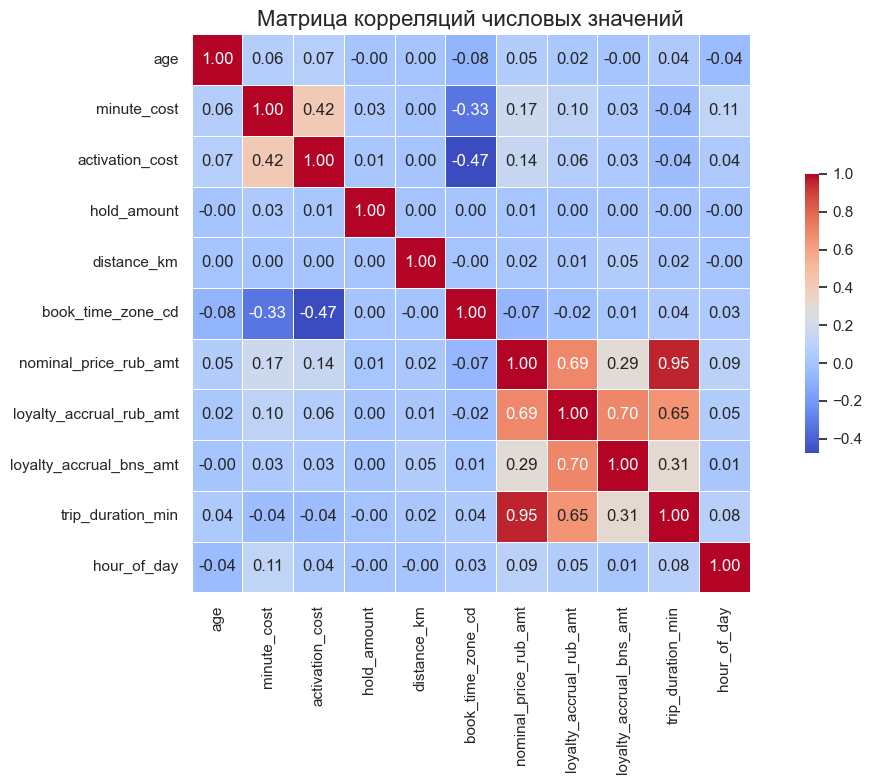

In [303]:
numeric_df = df_initial.select_dtypes(include='number').drop(columns=['order_rk','party_rk_id'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,        
            fmt=".2f",         
            cmap='coolwarm',   
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .5})
plt.title('Матрица корреляций числовых значений', fontsize=16)
plt.tight_layout()
#plt.savefig('grafik3.png')
plt.show()

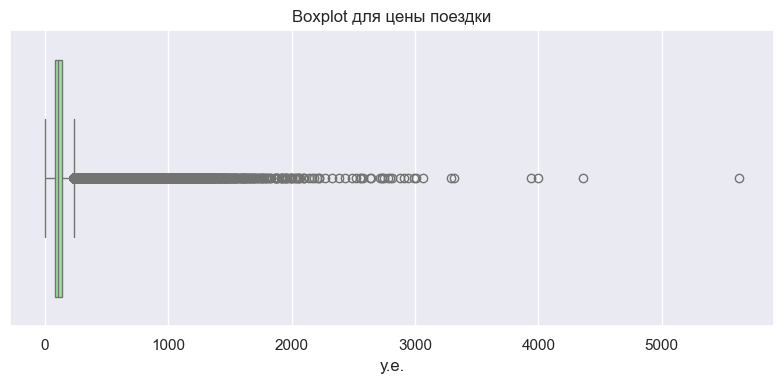

In [304]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_initial['nominal_price_rub_amt'], color='lightgreen')
plt.title('Boxplot для цены поездки')
plt.xlabel('у.е.')
plt.tight_layout()
#plt.savefig('grafik.png')
plt.show()

In [286]:
df_initial.query('distance_km > 10').agg({'order_rk': 'count'})

order_rk    8572
dtype: int64

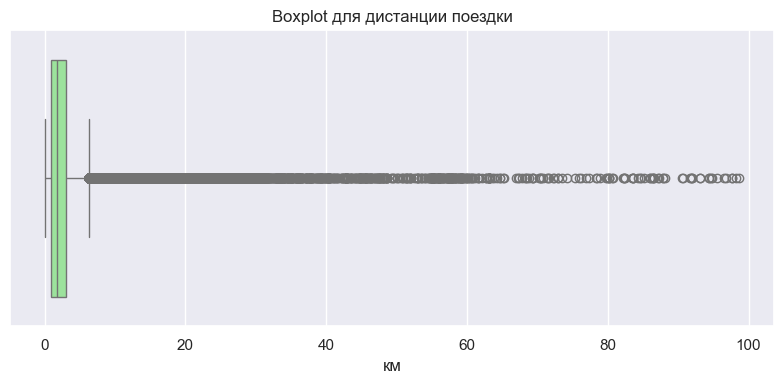

In [307]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_initial.query('distance_km < 100').distance_km, color='lightgreen')
plt.title('Boxplot для дистанции поездки')
plt.xlabel('км')
plt.tight_layout()
#plt.savefig('grafik1.png')
plt.show()

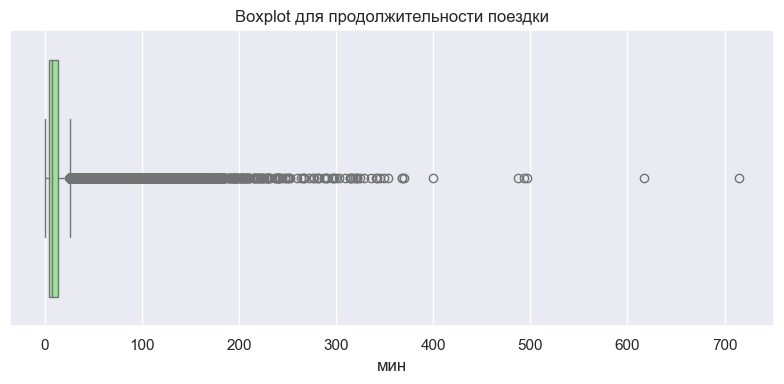

In [309]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_initial['trip_duration_min'], color='lightgreen')
plt.title('Boxplot для продолжительности поездки')
plt.xlabel('мин')
plt.tight_layout()
#plt.savefig('grafik2.png')
plt.show()

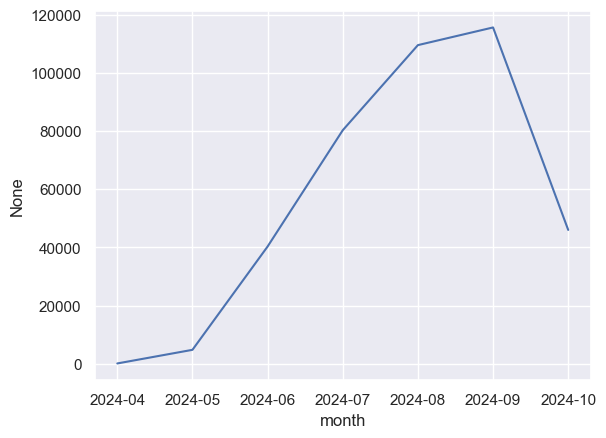

In [311]:
month_trip_count = pd.crosstab(index=df_initial['month'], columns='Число поездок')
sns.lineplot(data=month_trip_count, x=month_trip_count.index, y=month_trip_count.sum(axis=1))
#plt.savefig('grafik4.png')

plt.show()

In [291]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_initial['day_of_week'] = pd.Categorical(df_initial['day_of_week'], categories=weekday_order, ordered=True)
hour_weekday_crosstab= pd.crosstab(index=df_initial['hour_of_day'], columns=df_initial['day_of_week'])

In [293]:
pd.crosstab(index=df_initial['day_of_week'], columns='Число поездок')

col_0,Число поездок
day_of_week,
Monday,55227
Tuesday,57219
Wednesday,59139
Thursday,59665
Friday,62656
Saturday,54622
Sunday,48221


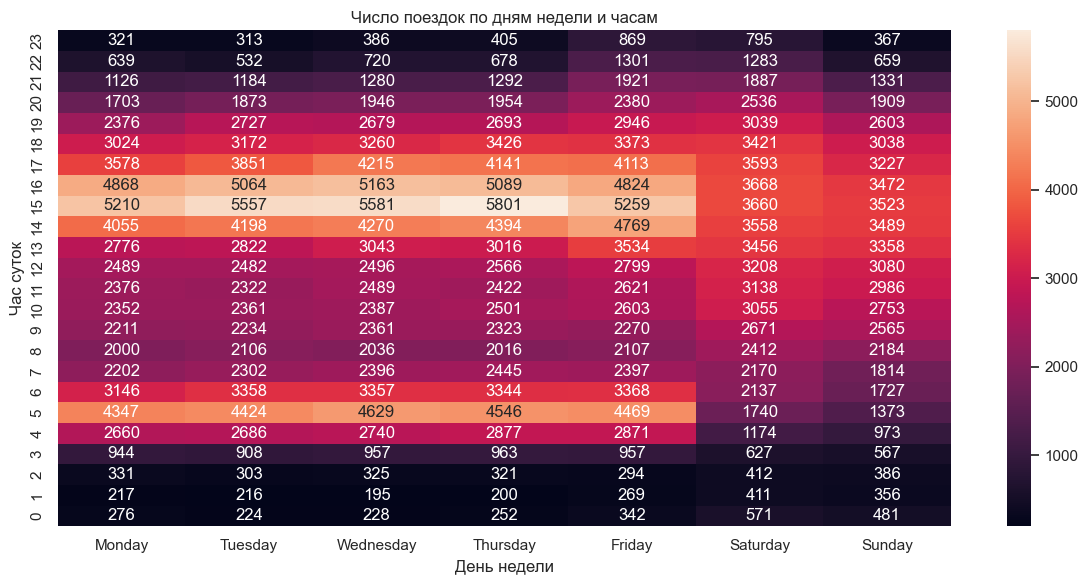

In [313]:
plt.figure(figsize=(12, 6))
hour_weekday_crosstab = hour_weekday_crosstab.sort_index(ascending=False)
sns.heatmap(hour_weekday_crosstab, cmap='rocket', annot=True, fmt='d')
plt.title('Число поездок по дням недели и часам')
plt.xlabel('День недели')
plt.ylabel('Час суток')
plt.tight_layout()
#plt.savefig('grafik5.png')

plt.show()

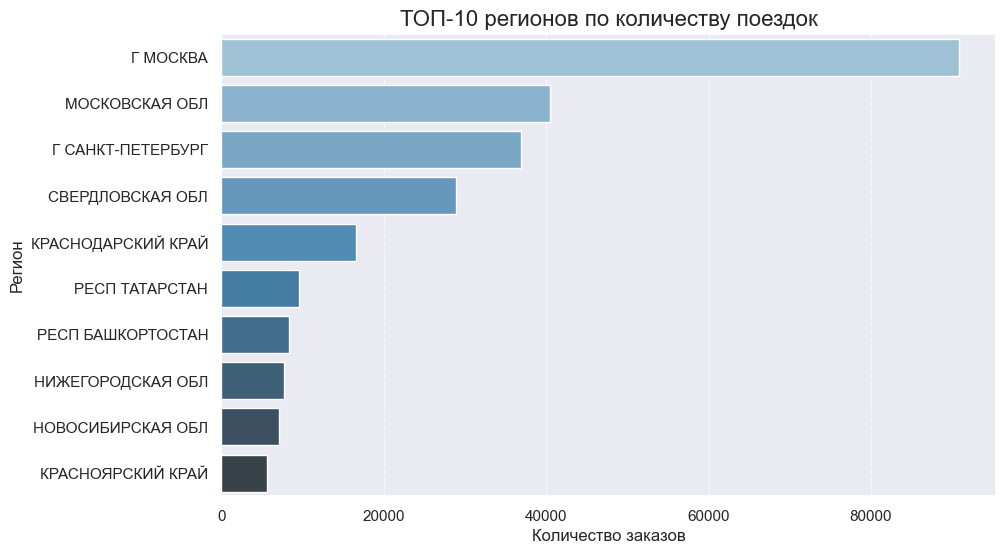

In [427]:
top_10_regions = df_initial.groupby('lvn_state_nm')['order_rk'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_regions.values, 
            y=top_10_regions.index, 
            palette='Blues_d', 
            hue=top_10_regions.index, 
            legend=False)
plt.title('ТОП-10 регионов по количеству поездок', fontsize=16)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.savefig('grafik5.png', bbox_inches='tight')
plt.show()

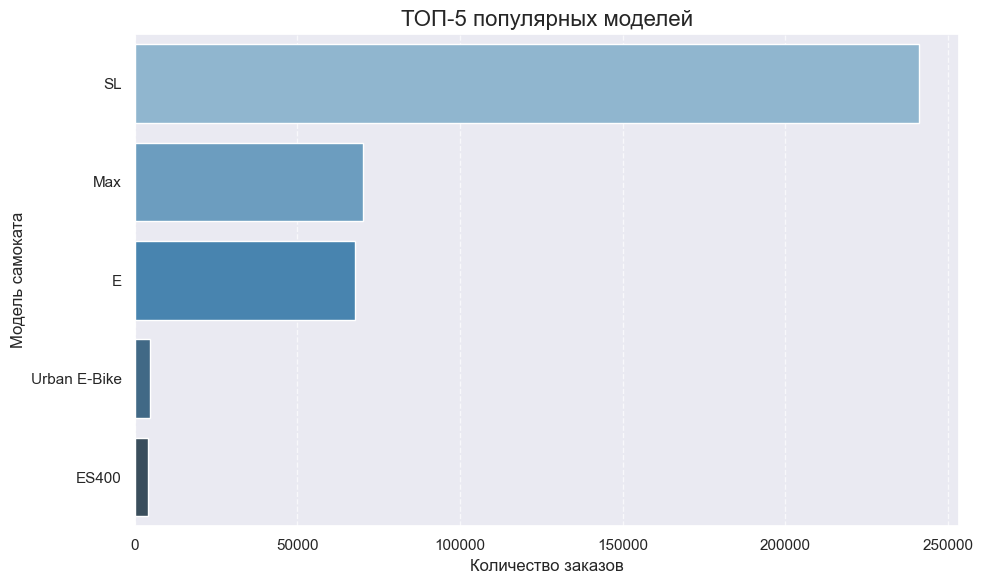

In [327]:
models = df_initial.groupby('transport_model')['order_rk'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=models.values,
    y=models.index,
    palette='Blues_d',
    hue=models.index,
    legend=False
)
plt.title('ТОП-5 популярных моделей', fontsize=16)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Модель самоката', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('grafik5.png', bbox_inches='tight')

plt.show()

In [214]:
df_initial['party_rk_id'].nunique()#число уникальных пользователей

64052

In [363]:
client_order_counts = df_initial.groupby('party_rk_id').agg({
    'order_rk': 'count',
    'gender_cd': 'first',
        'age': 'first',
    'lvn_state_nm': 'first',
    'month': 'first'
}).reset_index().rename(columns={'order_rk': 'order_count'})

In [365]:
client_order_counts

,party_rk_id,order_count,gender_cd,age,lvn_state_nm,month
0,14717,1,M,43,ЛЕНИНГРАДСКАЯ ОБЛ,2024-07
1,15725,4,M,40,Г МОСКВА,2024-08
2,22290,6,M,53,Г МОСКВА,2024-07
3,22530,4,M,38,СТАВРОПОЛЬСКИЙ КРАЙ,2024-07
4,27063,1,M,53,ОБЛ ЧЕЛЯБИНСКАЯ,2024-09
...,...,...,...,...,...,...
64047,1300448310,1,M,23,Г МОСКВА,2024-10
64048,1300455702,2,M,21,Г САНКТ-ПЕТЕРБУРГ,2024-10
64049,1300625360,1,M,33,Г МОСКВА,2024-10
64050,1300923278,1,M,19,Г МОСКВА,2024-10


In [367]:
client_order_counts.describe()#25% клиентов имеют больше 5 поездок, среднее число поездок 6, средний возраст 32

,party_rk_id,order_count,age
count,6.405200e+04,64052.000000,64052.000000
mean,6.146406e+08,6.194170,32.010210
std,3.342934e+08,13.711978,9.595817
min,1.471700e+04,1.000000,12.000000
25%,3.103429e+08,1.000000,24.000000
50%,6.270662e+08,2.000000,31.000000
75%,8.933941e+08,5.000000,38.000000
max,1.301075e+09,388.000000,94.000000


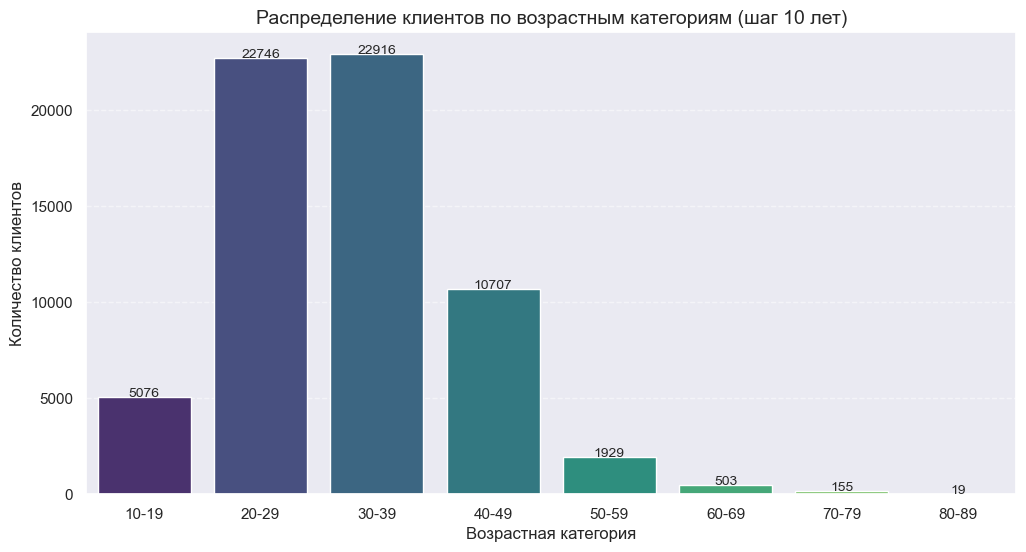

In [369]:
#Распределение клиентов по возрастным категориям с шагом 10 лет
bins = range(10, 100, 10)
labels = [f'{b}-{b+9}' for b in bins[:-1]]
client_order_counts['age_group'] = pd.cut(client_order_counts['age'], bins=bins, labels=labels, right=False)
age_dist = client_order_counts['age_group'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=age_dist.index,
    y=age_dist.values,
    palette='viridis',
    hue=age_dist.index,
    legend=False
)
plt.title('Распределение клиентов по возрастным категориям (шаг 10 лет)', fontsize=14)
plt.xlabel('Возрастная категория')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, val in enumerate(age_dist.values):
    plt.text(i, val + 2, val, ha='center', fontsize=10)
#plt.savefig('grafik5.png', bbox_inches='tight')

plt.show()


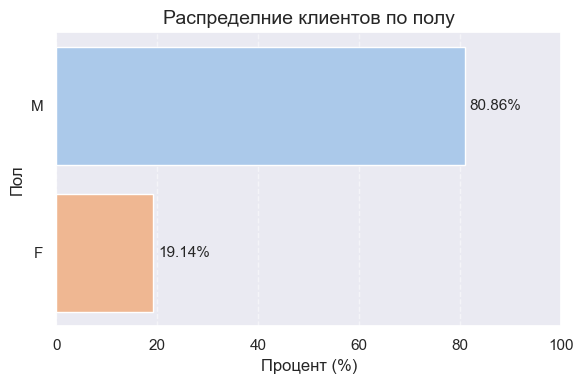

In [371]:
gender_pct = (client_order_counts['gender_cd'].value_counts(normalize=True) * 100).round(2) # процент пользователей мужчин и женщин
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_pct.values, 
            y=gender_pct.index, 
            palette='pastel'
            ,hue=gender_pct.index,
            legend=False)
plt.title('Распределние клиентов по полу', fontsize=14)
plt.xlabel('Процент (%)')
plt.ylabel('Пол')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
for i, val in enumerate(gender_pct.values):
    plt.text(val + 1, i, f'{val}%', va='center', fontsize=11)
plt.tight_layout()
#plt.savefig('grafik5.png', bbox_inches='tight')

plt.show()

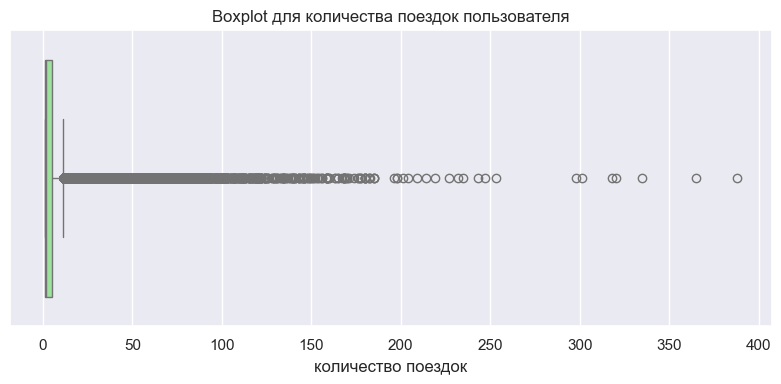

In [373]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=client_order_counts.order_count, color='lightgreen')
plt.title('Boxplot для количества поездок пользователя')
plt.xlabel('количество поездок')
plt.tight_layout()
#plt.savefig('grafik5.png', bbox_inches='tight')
plt.show()

In [375]:
client_order_counts.query('order_count >= 5')

,party_rk_id,order_count,gender_cd,age,lvn_state_nm,month,age_group
2,22290,6,M,53,Г МОСКВА,2024-07,50-59
5,28564,88,M,54,НИЖЕГОРОДСКАЯ ОБЛ,2024-08,50-59
7,211679,119,M,38,РЕСП МАРИЙ ЭЛ,2024-08,30-39
10,246113,6,M,51,НИЖЕГОРОДСКАЯ ОБЛ,2024-09,50-59
12,251847,39,M,47,Г МОСКВА,2024-06,40-49
...,...,...,...,...,...,...,...
64034,1291689496,5,M,29,Г МОСКВА,2024-10,20-29
64035,1292403333,6,F,25,Г МОСКВА,2024-10,20-29
64042,1295068872,9,F,29,НОВОСИБИРСКАЯ ОБЛ,2024-10,20-29
64043,1299893271,7,F,19,Г МОСКВА,2024-10,10-19


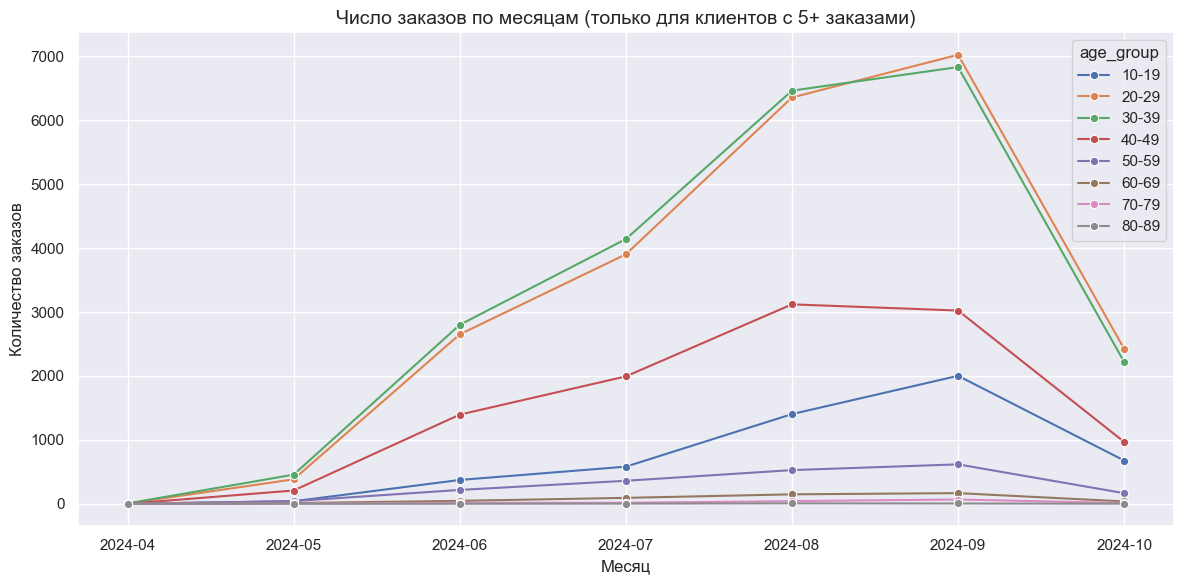

In [437]:
client_max = client_order_counts.groupby(['month', 'age_group'], observed=False)['order_count'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=client_max, x='month', y='order_count', hue='age_group', marker='o')
plt.title('Число заказов по месяцам (только для клиентов с 5+ заказами)', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
#plt.savefig('grafik5.png', bbox_inches='tight')
plt.show()


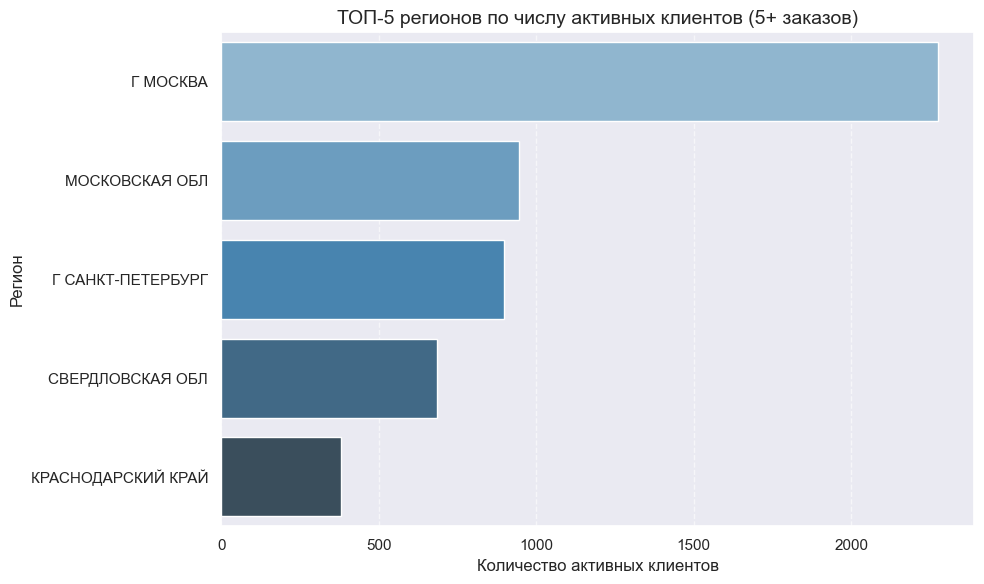

In [441]:
active_clients = client_order_counts.query('order_count >= 10')
region_counts = active_clients.groupby('lvn_state_nm')['party_rk_id'].count().sort_values(ascending=False)
top_5_regions = region_counts.head(5).reset_index()
top_5_regions.columns = ['region', 'client_count']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_regions,
    x='client_count',
    y='region',
    hue='region',            
    palette='Blues_d',
    legend=False              
)
plt.title('ТОП-5 регионов по числу активных клиентов (5+ заказов)', fontsize=14)
plt.xlabel('Количество активных клиентов')
plt.ylabel('Регион')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
#plt.savefig('grafik5.png', bbox_inches='tight')
plt.show()

In [409]:
df_initial.query('nominal_price_rub_amt > 100 and distance_km < 1')

,order_rk,party_rk_id,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,day_of_week,hour_of_day,month
52,253404199,1147851947,M,39,NaN,UNM,Г МОСКВА,8.49,0.0,300.0,...,2024-06-20 10:58:47.229000,3,2024-06-20 09:42:51.206312,645.24,64.53,NaN,75.933711,Thursday,9,2024-06
65,263336607,158111768,M,36,SCH,MAR,ВОЛОГОДСКАЯ ОБЛ,9.49,50.0,300.0,...,2024-07-28 02:00:04.395000,3,2024-07-28 01:07:48.480773,552.97,192.89,NaN,52.265237,Sunday,1,2024-07
71,257888346,586726861,M,27,GRD,UNM,АЛТАЙСКИЙ КРАЙ,8.99,50.0,300.0,...,2024-07-06 22:50:45.084283,3,2024-07-06 22:45:18.229081,103.94,15.59,NaN,5.447587,Saturday,22,2024-07
80,259978462,133974844,M,32,NaN,NaN,ЛЕНИНГРАДСКАЯ ОБЛ,7.49,50.0,300.0,...,2024-07-15 20:34:53.716653,3,2024-07-15 20:27:22.273557,109.92,32.98,NaN,7.524052,Monday,20,2024-07
95,266071277,260446566,F,36,GRD,MAR,МОСКОВСКАЯ ОБЛ,7.49,50.0,300.0,...,2024-08-07 12:36:18.467077,3,2024-08-07 12:29:04.744447,109.92,NaN,61.0,7.228711,Wednesday,12,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396589,271771556,221049947,M,43,GRD,DIV,Г МОСКВА,8.38,50.0,300.0,...,2024-08-28 07:11:37.418753,3,2024-08-28 07:06:27.491480,100.28,20.06,NaN,5.165455,Wednesday,7,2024-08
396630,269886073,115230960,F,35,GRD,MAR,МОСКОВСКАЯ ОБЛ,7.99,50.0,300.0,...,2024-08-21 16:57:21.494693,3,2024-08-21 16:50:12.450177,113.92,16.39,NaN,7.150742,Wednesday,16,2024-08
396693,258916638,733968343,M,24,GRD,UNM,ТЮМЕНСКАЯ ОБЛ,7.60,50.0,300.0,...,2024-07-11 18:33:50.622622,3,2024-07-11 18:20:48.044327,156.40,23.46,NaN,13.042972,Thursday,18,2024-07
396740,260757716,696224457,M,44,SCH,UNM,Г МОСКВА,8.94,50.0,300.0,...,2024-07-18 12:50:54.389300,3,2024-07-18 12:44:56.130304,103.64,10.36,NaN,5.970983,Thursday,12,2024-07


In [411]:
df_initial.query('activation_cost == 0')

,order_rk,party_rk_id,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,day_of_week,hour_of_day,month
10,269623419,941498825,F,18,NaN,NaN,NaN,6.49,0.0,300.0,...,2024-08-20 10:45:35.783325,7,2024-08-20 14:36:02.386185,64.90,6.49,NaN,9.556619,Tuesday,14,2024-08
28,291383137,678375751,M,39,GRD,MAR,КРАСНОЯРСКИЙ КРАЙ,5.99,0.0,300.0,...,2024-09-11 04:37:24.592000,7,2024-09-11 07:48:21.289000,299.50,29.95,NaN,49.055050,Wednesday,7,2024-09
52,253404199,1147851947,M,39,NaN,UNM,Г МОСКВА,8.49,0.0,300.0,...,2024-06-20 10:58:47.229000,3,2024-06-20 09:42:51.206312,645.24,64.53,NaN,75.933711,Thursday,9,2024-06
117,255493442,430960042,M,20,UGR,UNM,РЕСП УДМУРТСКАЯ,4.99,0.0,300.0,...,2024-06-28 18:49:22.502260,4,2024-06-28 19:36:02.362183,59.88,NaN,8.0,13.335668,Friday,19,2024-06
153,253404190,1014586385,M,20,NaN,NaN,МОСКОВСКАЯ ОБЛ,8.49,0.0,300.0,...,2024-06-20 08:01:06.152724,3,2024-06-20 07:58:02.110292,33.96,3.40,NaN,3.067374,Thursday,7,2024-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396646,257357100,733939083,M,18,NaN,NaN,Г САНКТ-ПЕТЕРБУРГ,6.49,0.0,300.0,...,2024-07-05 07:32:18.805453,3,2024-07-05 07:21:53.584218,71.39,10.71,NaN,10.420354,Friday,7,2024-07
396649,252634967,752346648,M,20,NaN,NaN,ЛЕНИНГРАДСКАЯ ОБЛ,5.99,0.0,300.0,...,2024-06-17 11:14:02.595934,3,2024-06-17 10:56:18.144339,107.82,10.78,NaN,17.740860,Monday,10,2024-06
396690,252612895,1041439272,M,19,NaN,NaN,Г МОСКВА,8.49,0.0,300.0,...,2024-06-11 08:10:55.614970,3,2024-06-11 07:49:05.935428,186.78,46.70,NaN,21.827992,Tuesday,7,2024-06
396698,253684644,1039438642,M,43,UGR,DIV,РЕСП УДМУРТСКАЯ,4.99,0.0,300.0,...,2024-06-21 17:39:24.112013,4,2024-06-21 18:30:53.781755,44.91,4.49,NaN,8.505504,Friday,18,2024-06
